In [7]:
%matplotlib inline
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [9]:
import katarchive

import datetime

import logging
logging.root.setLevel(logging.ERROR)


In [10]:
def findproj(text):
    found='Unknown'        # default
    chx=text.find('prop')
    if chx >0  :
        pr2=text[chx+11:chx+38].split()
        code=pr2[0]
        found=code.replace("=","")
    else:
        if text.find('maser') >0:
            found="Maser monitoring"
            #print text
    return found

In [11]:
begin="20/05/2016"
today=datetime.datetime.today()
end=today.strftime(format="%d/%m/%Y")

In [12]:
print katarchive.search_archive(startdate=begin,enddate=end)


Searched using: CAS.ProductTypeName:(KatFile) AND CAS.ProductTransferStatus:RECEIVED AND StartTime:[2016-05-19T22:00:00Z TO 2016-06-08T21:59:59Z]
Returning 137 results
[['1', '2016-06-07 16:17:39 SAST', 'Nadeem', [19401136]], ['1', '2016-06-07 15:51:14 SAST', 'Nadeem', [19424920]], ['1', '2016-06-07 15:43:52 SAST', 'Nadeem', [19415465]], ['1', '2016-06-07 15:18:05 SAST', 'Nadeem', [19399689]], ['1', '2016-06-07 15:12:25 SAST', 'operator', [169940177]], ['1', '2016-06-07 09:09:05 SAST', 'Nadeem', [1298429720]], ['1', '2016-06-06 18:09:38 SAST', 'Nadeem', [2579906036]], ['1', '2016-06-06 09:15:16 SAST', 'Nadeem', [1910095247]], ['1', '2016-06-04 18:03:14 SAST', 'Nadeem', [3916578689]], ['1', '2016-06-03 11:30:17 SAST', 'Nadeem', [1141505882]], ['1', '2016-06-03 11:26:10 SAST', 'operator', [61373363]], ['1', '2016-06-03 09:16:55 SAST', 'Sean', [4187954966]], ['1', '2016-06-03 09:14:29 SAST', 'operator', [60785898]], ['1', '2016-06-03 08:17:41 SAST', 'Lindsay', [1084510849]], ['1', '2016-0

In [13]:
f = katarchive.search_archive(startdate=begin)
start = datetime.datetime.strptime(f[-1].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')
end = datetime.datetime.strptime(f[0].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')

Searched using: CAS.ProductTypeName:(KatFile) AND CAS.ProductTransferStatus:RECEIVED AND StartTime:[2016-05-19T22:00:00Z TO 2016-06-08T21:59:59Z]
Returning 137 results


In [14]:
#print 'First file in run: ' , start.isoformat()
#print 'Last file in run: ' , end.isoformat()

In [24]:
for fi in f:
    txts=fi.metadata.InstructionSet
    p=findproj(txts)
    print p, fi.metadata.Duration, fi.metadata.Description, len(fi.metadata.Antennas)


COMM_Image_NO 310.0 Imaging Calibration 5
COMM_Image_NO 310.0 Imaging Calibration 5
COMM_Image_NO 310.0 Imaging Calibration 5
COMM_Image_NO 310.0 Imaging Calibration 5
COMM_Atten 302.02 Auto atten 5
COMM_Image_NO 21760.3 Imaging Calibration 5
COMM_Image_NO 43250.6 Imaging Calibration 5
COMM_Image_NO 32020.44 Imaging Calibration 5
COMM_Image_NO 65670.91 Imaging Calibration 5
COMM_Image_NO 19130.26 Imaging Calibration 5
COMM_Atten 108.01 Auto atten 5
COMM_RFI_SP 7482.59 Basic RFI Scan: RFI SCAN 5
COMM_Atten 107.01 Auto atten 5
COMM_Point_LM 1936.15 Pointing Observation 5
COMM_Atten 84.01 Auto atten 5
Maser monitoring 48504.73 OH maser monitoring 5
COMM_Atten 63.42 Auto atten 5
COMM_Atten 40.0 Auto atten 5
COMM_Atten 83.55 Auto atten 5
COMM_Bandpass_TF 17680.24 Bandpass Calibrators 5
COMM_Atten 79.01 Auto atten 5
Maser monitoring 46924.32 OH maser monitoring 5
COMM_Atten 106.7 Auto atten 5
20150619TF-01 13570.19 3C279 5
COMM_Atten 107.01 Auto atten 5
COMM_Image_NO 15000.21 Imaging Calibra

Only select observations that are longer than 1 hrs then extract the project id from the script parameters. If there is no project id then allocated No_project_id 

In [16]:
sbd = [] #Experiment ID
pid = [] #project ID
fnd = [] #Filename
dud = [] #Duration
antsd = [] #number of antennas
scrd = [] #script  -NOT USED NOW

for fi in f:
    if fi.metadata.Duration < 3600: #only pick hour long or greater observations for analysis
        continue
    # now try extract the project-id from the instruction-set string
    """
    script = fi.metadata.InstructionSet
    scrd.append(script)
    spl = script.split()
    """
    txts=fi.metadata.InstructionSet
    p=findproj(txts)
    if p == "Unknown":
        p="Maser Monitoring"
    sbd.append(fi.metadata.ExperimentID)
    pid.append(p)
    fnd.append(fi.metadata.Filename)
    dud.append(fi.metadata.Duration)
    antsd.append(len(fi.metadata.Antennas))


In [17]:
pi = np.array(pid)
sb = np.array(sbd)
du = np.array(dud)
ants = np.array(antsd)

p_cent = (sum(du)/((end.toordinal()-start.toordinal())*24*3600))*100

print 'Percentage system usage: ', np.floor(p_cent),'%'


Percentage system usage:  69.0 %


In [18]:
a_id = []
a_time = []
for p in set(pi):
    ind = pi == p
    print p,round(sum(du[ind])/3600,2)
    a_id.append(p)
    a_time.append(round(sum(du[ind])/3600,2))

20141111IM-01 4.1
COMM_Tipping_NO 2.14
20130822NO-01 11.16
COMM_Bandpass_TF 42.76
20141002MB-01 6.01
20150127CC-01 40.19
20150619TF-01 3.77
20141219SS-01 19.37
COMM_RFI_SP 28.42
20150210SS-01 4.07
COMM_Image_NO 98.57
COMM_Point_LM 1.73
Maser monitoring 39.78


In [19]:
ind = np.argsort(a_id)
for i in ind:
    print ("%-16s %5.1f %d") %(a_id[i],a_time[i],ants[i])

20130822NO-01     11.2 5
20141002MB-01      6.0 5
20141111IM-01      4.1 5
20141219SS-01     19.4 5
20150127CC-01     40.2 5
20150210SS-01      4.1 5
20150619TF-01      3.8 5
COMM_Bandpass_TF  42.8 5
COMM_Image_NO     98.6 5
COMM_Point_LM      1.7 5
COMM_RFI_SP       28.4 5
COMM_Tipping_NO    2.1 5
Maser monitoring  39.8 5


Find the unique project ids and determine the total observation duration.

Sort ID and time for display

Plot as pie-chart

In [20]:
cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., 7))

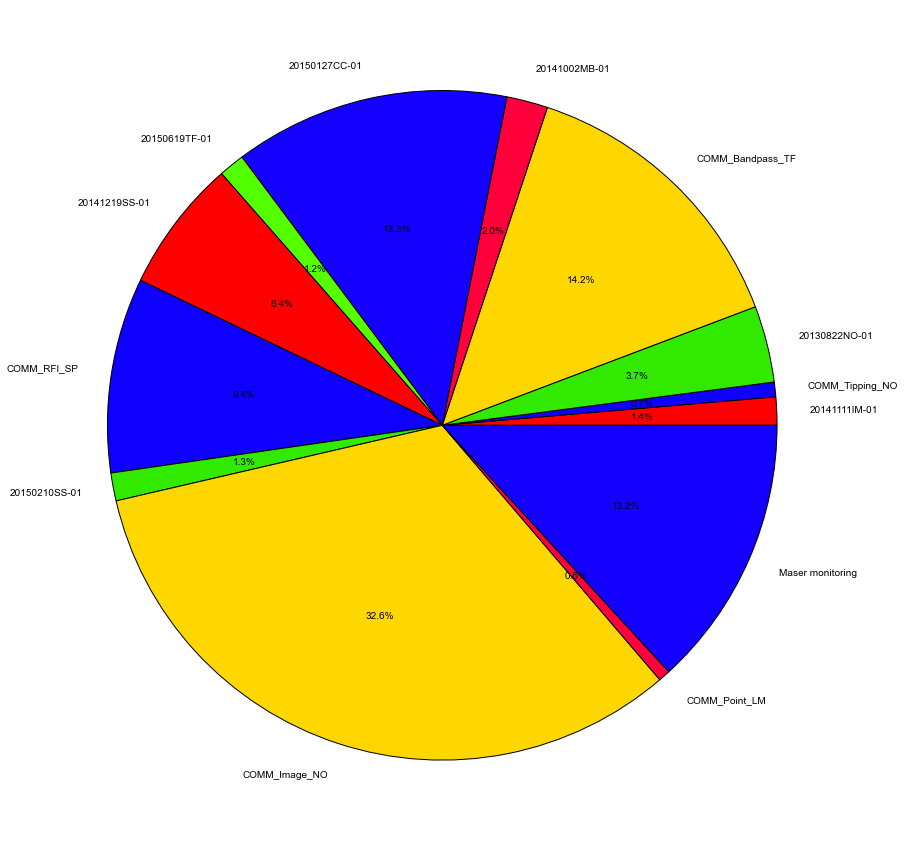

In [21]:
plt.figure(figsize=(15,15))
plt.pie(a_time,labels=a_id,colors=colors,autopct='%1.1f%%');

In [22]:
plt.show()

In [23]:
fi.metadata.InstructionSet

u'/home/kat/scripts/observation/auto_attenuate.py -f 1328 -t radec,0,-90 --mode=bc16n400M1k --proposal-id COMM_Atten program-block-id=264ob19046284 --sb-id-code=20160519-0006 --description= AutoAttenuation for 264ob19046284  --observer=operator --config-label=Auto2016-03-01T11h45m26.0Z'